# Dữ liệu tin tức tiếng Việt

In [1]:
%cd '/content/drive/MyDrive/CE Project'
!ls

/content/drive/MyDrive/CE Project
 data   image  'Use Library.ipynb'


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
import os
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from sklearn.neighbors import KNeighborsClassifier

## Load data

In [ ]:
# Đường dẫn
train_x_path = 'data/vn news/train_x.sav'
train_y_path = 'data/vn news/train_y.sav'
test_x_path = 'data/vn news/test_x.sav'
test_y_path = 'data/vn news/test_y.sav'

# Load dữ liệu
x_train = np.array(pickle.load(open(train_x_path, 'rb')))
y_train = np.array(pickle.load(open(train_y_path, 'rb')))
x_test = np.array(pickle.load(open(test_x_path, 'rb')))
y_test = np.array(pickle.load(open(test_y_path, 'rb')))

In [ ]:
# nhãn văn bản
labels = ['Am nhac',
          'Am thuc',
          'Bat dong san',
          'Bong da',
          'Chung khoan',
          'Cum ga',
          'Cuoc song do day',
          'Du hoc',
          'Du lich',
          'Duong vao WTO',
          'Gia dinh',
          'Giai tri tin hoc',
          'Giao duc',
          'Gioi tinh',
          'Hackers va Virus',
          'Hinh su',
          'Khong gian song',
          'Kinh doanh quoc te',
          'Lam dep',
          'Loi song',
          'Mua sam',
          'My thuat',
          'San khau dien anh',
          'San pham tin hoc moi',
          'Tennis',
          'The gioi tre',
          'Thoi trang']
print('Số lượng nhãn:', len(labels))


Số lượng nhãn: 27


## Chia tập train và valid

In [ ]:
# Khởi tạo StratifiedKFold object cho tập train và tập valid
num_folds = 5
rstate = 1
spliter = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=rstate)

## Trích chọn đặc trưng

In [ ]:
feature_extractor = Pipeline([
    # Chuyển tập dữ liệu sang dạng vector count dựa trên một vocab chung (BoW), loại bỏ những word có tần suất xuất hiện > 0.8
    ('vectorize', CountVectorizer(max_df=0.8, encoding='utf-16')),
    
    # Áp dụng TF-IDF để trích chọn đặc trưng (extract feature)
    ('feature extracter', TfidfTransformer())
])

train_features = feature_extractor.fit_transform(x_train, y_train)
print('Kích thước vector input: ', train_features.shape[1])

Kích thước vector input:  79170


In [ ]:
# sử dụng thư viện TSNE để convert vector 79170 chiều thành vector 2 chiều
# việc này sẽ giúp việc visualize thuận tiện hơn
tsne = TSNE(n_components=2, random_state=rstate)
train_x_2d = tsne.fit_transform(train_features)
print('Kích thước mới: ', train_x_2d.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Kích thước mới:  (14375, 2)


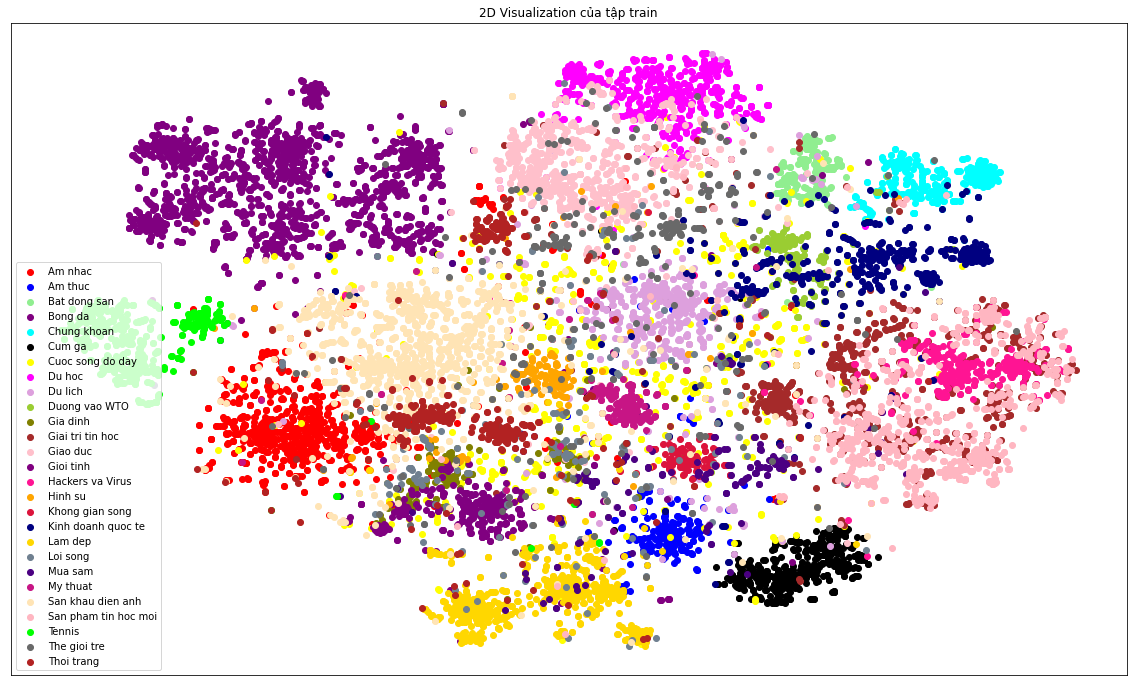

In [ ]:
# scatter các điểm dữ liệu lên mặt phẳng 2 chiều
plt.figure(figsize=(20, 12))
color_map = {
    0: 'red', 1: 'blue', 2: 'lightgreen', 3: 'purple', 4: 'cyan', 5: 'black', 6: 'yellow', 7: 'magenta',
    8: 'plum', 9: 'yellowgreen', 10: 'olive', 11: 'brown', 12: 'pink', 13: 'purple', 14: 'deeppink',
    15: 'orange', 16: 'crimson', 17: 'navy', 18: 'gold', 19: 'greenyellow', 19: 'aquamarine', 19: 'slategrey',
    20: 'indigo', 21: 'mediumvioletred', 22: 'moccasin', 23: 'lightpink', 24: 'lime', 25: 'dimgrey', 26: 'firebrick'
}

for idx, label in enumerate(labels):
    plt.scatter(x=train_x_2d[y_train == label, 0], y=train_x_2d[y_train == label, 1], marker='o', c=color_map[idx], label=label)

plt.xticks([])
plt.yticks([])
plt.legend()
plt.title('2D Visualization của tập train')
plt.savefig('image/feature_extractor_visualization.png', facecolor='whitesmoke', bbox_inches='tight', dpi = 300)
plt.show()

## Train

In [ ]:
# Save train time each model
train_times = []

In [ ]:
# Mô hình KNN với K = 30 và sử dụng khoảng cách Euclide
knn = KNeighborsClassifier(n_neighbors=30, metric='euclidean')
start = time.time()
knn.fit(train_features, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong KNN sau {:.2f}s'.format(tmp))

Huấn luyện xong KNN sau 0.03s


In [ ]:
# Mô hình Multinomial Naive Bayes với alpha = 0.005
mnb = MultinomialNB(alpha=0.005)
start = time.time()
mnb.fit(train_features, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong Multinomial Naive Bayes sau {:.2f}s'.format(tmp))

Huấn luyện xong Multinomial Naive Bayes sau 0.40s


In [ ]:
# Mô hình Softmax Regression phương pháp hiệu chỉnh L2, C = 16
lreg = LogisticRegression(C=16, solver='lbfgs', multi_class='multinomial', max_iter=10_000)
start = time.time()
lreg.fit(train_features, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong Softmax Regression sau {:.2f}s'.format(tmp))

Huấn luyện xong Softmax Regression sau 200.84s


In [ ]:
# Mô hình SVM sử dụng hàm linear và C = 10
svm = SVC(C=10, kernel='linear')
start = time.time()
svm.fit(train_features, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong SVM sau {:.2f}s'.format(tmp))

Huấn luyện xong SVM sau 222.51s


## Đánh giá các model

In [ ]:
# Đánh giá các mô hình trên tập test
# Trích chọn đặc trưng của tập test
test_features = feature_extractor.transform(x_test)

# save scores each model
accuracy_scores = []
f1_scores = []

In [ ]:
# KNN
y_pred = knn.predict(test_features)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('KNN:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

KNN:
Accuracy score: 82.138 %
F1 score:       77.481 %


In [ ]:
# MNB
y_pred = mnb.predict(test_features)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('MNB:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

MNB:
Accuracy score: 88.191 %
F1 score:       86.751 %


In [ ]:
# Softmax
y_pred = lreg.predict(test_features)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('Softmax:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

Softmax:
Accuracy score: 91.206 %
F1 score:       89.428 %


In [ ]:
# SVM
y_pred = svm.predict(test_features)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('SVM:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

SVM:
Accuracy score: 90.759 %
F1 score:       89.115 %


## Visualize

In [ ]:
models = np.array(['KNN', 'Multinomial NB', 'Softmax Regression', 'SVM'])

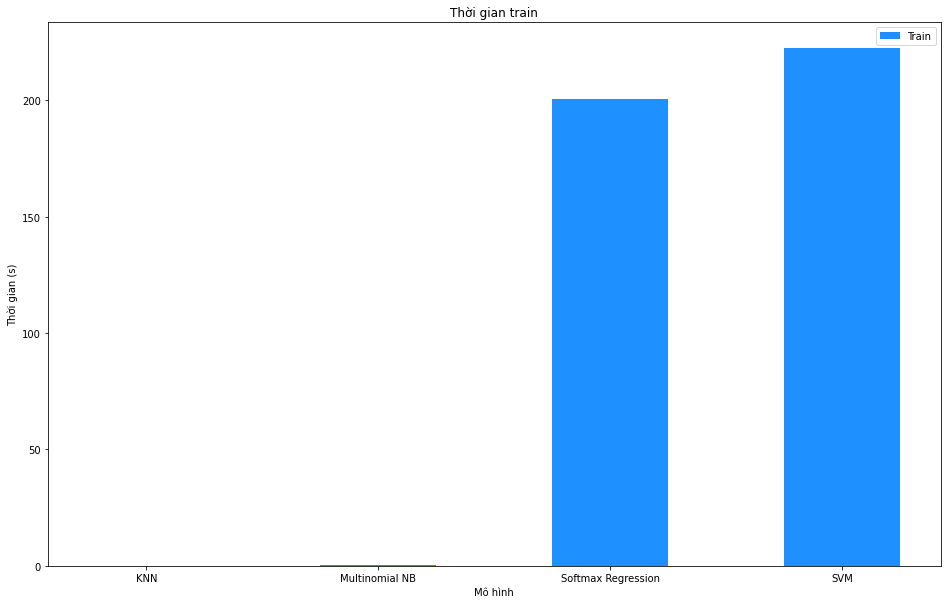

In [ ]:
# Về thời gian
plt.figure(figsize=(16, 10))
plt.title('Thời gian train')
plt.xlabel('Mô hình')
plt.ylabel('Thời gian (s)')
plt.bar(models, np.array(train_times), color='dodgerblue', width=0.5, label='Train')
plt.legend(loc='best')
plt.savefig('image/time_comparision.png', facecolor='whitesmoke')
plt.show()

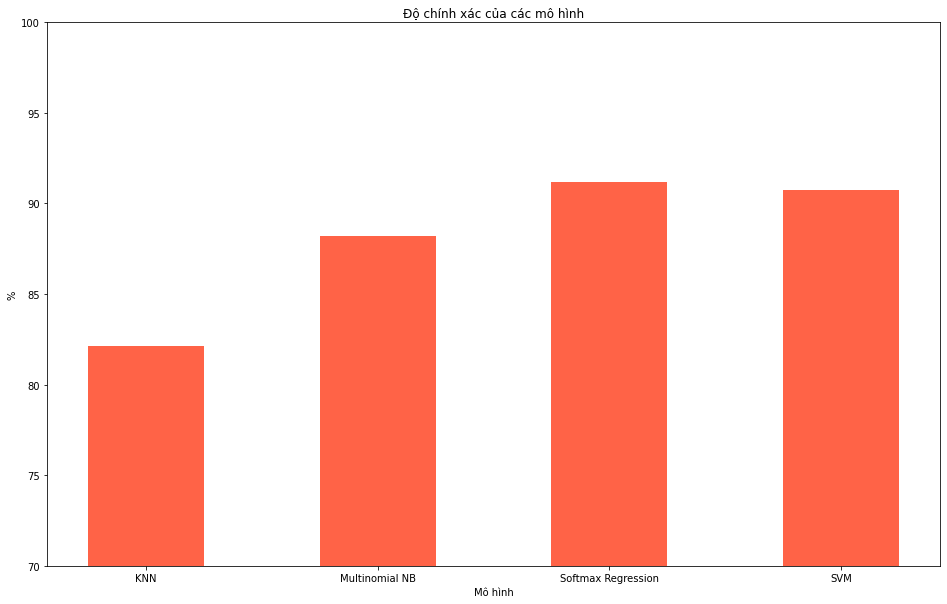

In [ ]:
# Về độ chính xác
plt.figure(figsize=(16, 10))
plt.title('Độ chính xác của các mô hình')
plt.xlabel('Mô hình')
plt.ylabel('%')
plt.ylim(70, 100)
plt.bar(models, np.array(accuracy_scores) * 100, color='tomato', width=0.5, label='Accuracy')
plt.savefig('image/accuracy_comparision.png', facecolor='whitesmoke')
plt.show()

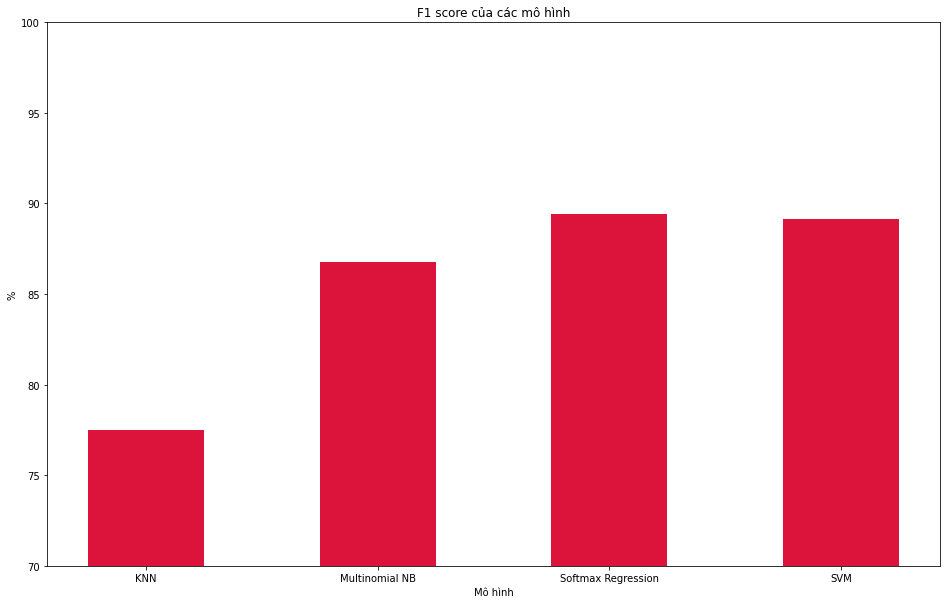

In [ ]:
# Về F1 score
plt.figure(figsize=(16, 10))
plt.title('F1 score của các mô hình')
plt.xlabel('Mô hình')
plt.ylabel('%')
plt.ylim(70, 100)
plt.bar(models, np.array(f1_scores) * 100, color='crimson', width=0.5, label='F1')
plt.savefig('image/vn_news_f1_comparision.png', facecolor='whitesmoke')
plt.show()

# CIFAR10

In [28]:
%cd '/content/drive/MyDrive/CE Project'
!ls

/content/drive/MyDrive/CE Project
 data   image  'Use Library.ipynb'


In [3]:
from keras.applications import VGG16, imagenet_utils
import cv2
import tensorflow as tf
from keras.datasets import mnist, cifar10

In [4]:
(X_train_raw, y_train), (X_test_raw, y_test) = cifar10.load_data()
print(X_train_raw.shape, X_test_raw.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


In [19]:
ids = np.random.choice(X_train_raw.shape[0], 10000)
X_train_raw = X_train_raw[ids]
y_train = y_train[ids]
print(X_train_raw.shape, y_train.shape)

(10000, 32, 32, 3) (10000, 1)


## Feature Extractor

In [20]:
X_train = np.zeros((10000, 224, 224, 3), dtype=np.uint8)
for i in range(X_train_raw.shape[0]):
    X_train[i] = cv2.resize(X_train_raw[i], (224, 224))
    X_train[i] = imagenet_utils.preprocess_input(X_train[i])

print(X_train.shape)

(10000, 224, 224, 3)


In [5]:
X_test = np.zeros((10000, 224, 224, 3), dtype=np.uint8)
for i in range(X_test_raw.shape[0]):
    X_test[i] = cv2.resize(X_test_raw[i], (224, 224))
    X_test[i] = imagenet_utils.preprocess_input(X_test[i])

print(X_test.shape)

(10000, 224, 224, 3)


In [7]:
# Load model VGG 16 của ImageNet dataset, include_top=False để bỏ phần Fully connected layer ở cuối.
model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [22]:
# Dùng pre-trained model để lấy ra các feature của ảnh
features = model.predict(X_train)

# Giống bước flatten trong CNN, chuyển từ tensor 3 chiều sau ConvNet sang vector 1 chiều
features = features.reshape((features.shape[0], 512*7*7))

313/313 [==============================] - 47s 151ms/step


In [8]:
# Dùng pre-trained model để lấy ra các feature của ảnh
test_features = model.predict(X_test)

# Giống bước flatten trong CNN, chuyển từ tensor 3 chiều sau ConvNet sang vector 1 chiều
test_features = test_features.reshape((test_features.shape[0], 512*7*7))

313/313 [==============================] - 56s 147ms/step


In [33]:
pickle.dump(features, open('data/saved/train_features.sav', 'wb'))
pickle.dump(y_train, open('data/saved/y_train.sav', 'wb'))

In [9]:
pickle.dump(test_features, open('data/saved/test_features.sav', 'wb'))

## Train

In [6]:
features = np.array(pickle.load(open('data/saved/train_features.sav', 'rb')))
y_train = np.array(pickle.load(open('data/saved/y_train.sav', 'rb')))

In [8]:
# Save train time each model
train_times = []

In [9]:
y_train = y_train.reshape(-1)

In [10]:
# Mô hình KNN với K = 30 và sử dụng khoảng cách Euclide
knn = KNeighborsClassifier(n_neighbors=30, metric='euclidean')
start = time.time()
knn.fit(features, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong KNN sau {:.2f}s'.format(tmp))

Huấn luyện xong KNN sau 0.18s


In [11]:
# Mô hình Multinomial Naive Bayes với alpha = 0.005
mnb = MultinomialNB(alpha=0.005)
start = time.time()
mnb.fit(features, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong Multinomial Naive Bayes sau {:.2f}s'.format(tmp))

Huấn luyện xong Multinomial Naive Bayes sau 1.63s


In [ ]:
# Mô hình Softmax Regression phương pháp hiệu chỉnh L2, C = 16
lreg = LogisticRegression(C=16, solver='lbfgs', multi_class='multinomial', max_iter=10_000)
start = time.time()
lreg.fit(features, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong Softmax Regression sau {:.2f}s'.format(tmp))

# Flower dataset

In [18]:
# Thêm thư viện
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imutils import paths
from keras.applications import VGG16
from keras.applications import imagenet_utils
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.applications import VGG16
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
import numpy as np
import random
import os

In [19]:
%cd '/content/drive/MyDrive/CE Project'
!ls

/content/drive/MyDrive/CE Project
 data   dataset   image  'Use Library.ipynb'


## Feature extractor

In [20]:
# Lấy các đường dẫn đến ảnh.
image_path = list(paths.list_images('dataset/'))

# Đổi vị trí ngẫu nhiên các đường dẫn ảnh
random.shuffle(image_path)

# Đường dẫn ảnh sẽ là dataset/tên_loài_hoa/tên_ảnh ví dụ dataset/Bluebell/image_0241.jpg nên p.split(os.path.sep)[-2] sẽ lấy ra được tên loài hoa
labels = [p.split(os.path.sep)[-2] for p in image_path]

# Chuyển tên các loài hoa thành số
le = LabelEncoder()
labels = le.fit_transform(labels)

# One-hot encoding
# lb = LabelBinarizer()
# labels = lb.fit_transform(labels)

# Load ảnh và resize về đúng kích thước mà VGG 16 cần là (224,224)
list_image = []
for (j, imagePath) in enumerate(image_path):
    image = tf.keras.utils.load_img(imagePath, target_size=(224, 224))
    image = tf.keras.utils.img_to_array(image)

    image = np.expand_dims(image, 0)
    image = imagenet_utils.preprocess_input(image)

    list_image.append(image)

list_image = np.vstack(list_image)


In [33]:
labels = [p.split(os.path.sep)[-2] for p in image_path]
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels)

[10 16  1 ...  6 15  9]


In [21]:
# Dùng pre-trained model để lấy ra các feature của ảnh
features = model.predict(list_image)

# Giống bước flatten trong CNN, chuyển từ tensor 3 chiều sau ConvNet sang vector 1 chiều
features = features.reshape((features.shape[0], 512*7*7))

43/43 [==============================] - 17s 172ms/step


In [27]:
pickle.dump(features, open('data/saved/flower_features.sav', 'wb'))

In [34]:
pickle.dump(labels, open('data/saved/flower_labels.sav', 'wb'))

## Train

In [35]:
# Chia traing set, test set tỉ lệ 80-20
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [36]:
# Save train time each model
train_times = []

In [37]:
# Mô hình KNN với K = 30 và sử dụng khoảng cách Euclide
knn = KNeighborsClassifier(n_neighbors=30, metric='euclidean')
start = time.time()
knn.fit(X_train, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong KNN sau {:.2f}s'.format(tmp))

Huấn luyện xong KNN sau 0.02s


In [38]:
# Mô hình Multinomial Naive Bayes với alpha = 0.005
mnb = MultinomialNB(alpha=0.005)
start = time.time()
mnb.fit(X_train, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong Multinomial Naive Bayes sau {:.2f}s'.format(tmp))

Huấn luyện xong Multinomial Naive Bayes sau 0.16s


In [40]:
# Mô hình Softmax Regression phương pháp hiệu chỉnh L2, C = 16
lreg = LogisticRegression(C=16, solver='lbfgs', multi_class='multinomial', max_iter=10_000)
start = time.time()
lreg.fit(X_train, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong Softmax Regression sau {:.2f}s'.format(tmp))

Huấn luyện xong Softmax Regression sau 17.39s


In [41]:
# Mô hình SVM sử dụng hàm linear và C = 10
svm = SVC(C=10, kernel='linear')
start = time.time()
svm.fit(X_train, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong SVM sau {:.2f}s'.format(tmp))

Huấn luyện xong SVM sau 18.38s


## Evaluate

In [42]:
accuracy_scores = []
f1_scores = []

In [43]:
# KNN
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('KNN:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

KNN:
Accuracy score: 42.279 %
F1 score:       44.869 %


In [44]:
# MNB
y_pred = mnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('MNB:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

MNB:
Accuracy score: 83.824 %
F1 score:       84.029 %


In [45]:
# Softmax
y_pred = lreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('Softmax:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

Softmax:
Accuracy score: 92.279 %
F1 score:       92.622 %


In [46]:
# SVM
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('SVM:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

SVM:
Accuracy score: 90.809 %
F1 score:       91.470 %


## Visualization

In [47]:
models = np.array(['KNN', 'Multinomial NB', 'Softmax Regression', 'SVM'])

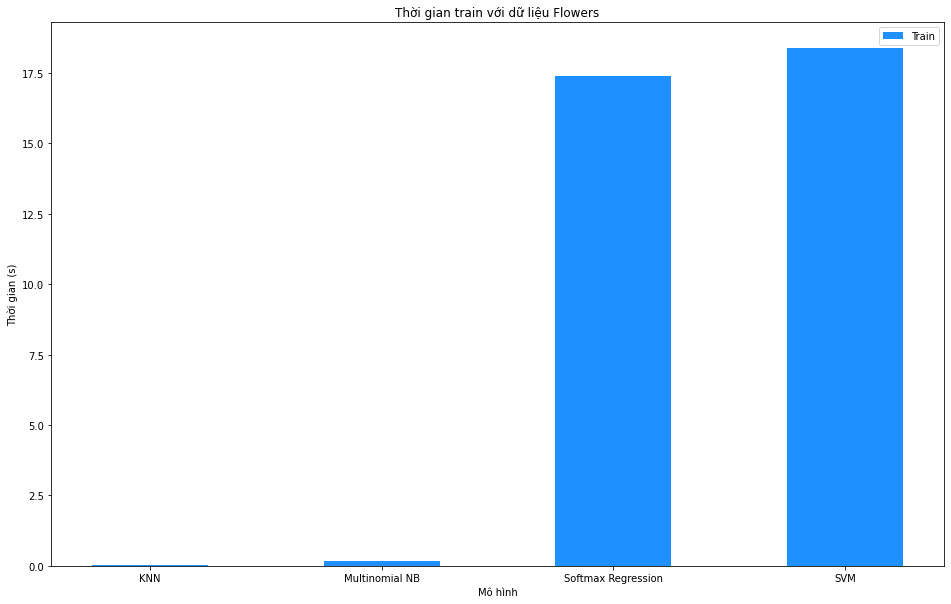

In [48]:
# Về thời gian
plt.figure(figsize=(16, 10))
plt.title('Thời gian train với dữ liệu Flowers')
plt.xlabel('Mô hình')
plt.ylabel('Thời gian (s)')
plt.bar(models, np.array(train_times), color='dodgerblue', width=0.5, label='Train')
plt.legend(loc='best')
plt.savefig('image/flowers_time_comparision.png', facecolor='whitesmoke')
plt.show()

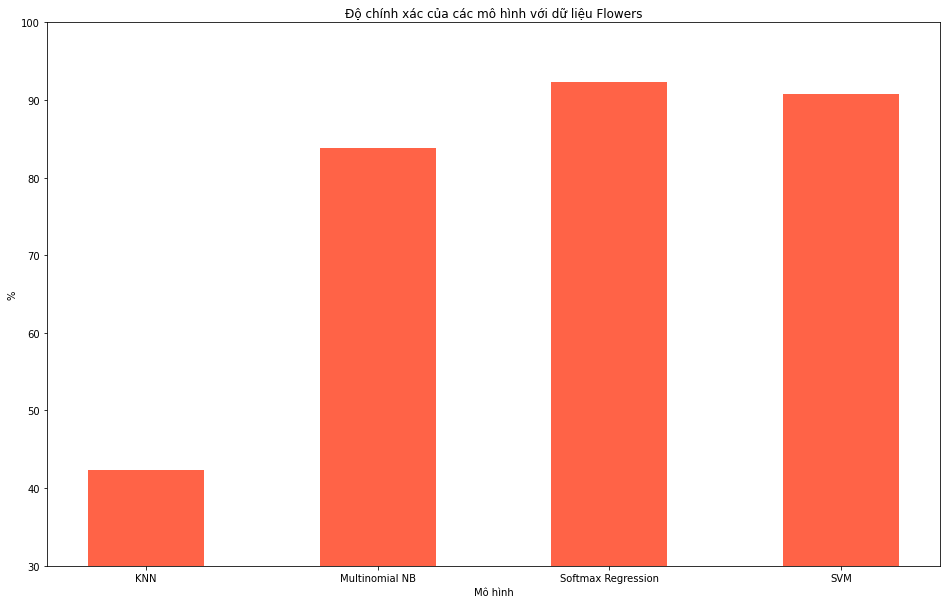

In [49]:
# Về độ chính xác
plt.figure(figsize=(16, 10))
plt.title('Độ chính xác của các mô hình với dữ liệu Flowers')
plt.xlabel('Mô hình')
plt.ylabel('%')
plt.ylim(30, 100)
plt.bar(models, np.array(accuracy_scores) * 100, color='tomato', width=0.5, label='Accuracy')
plt.savefig('image/flowers_accuracy_comparision.png', facecolor='whitesmoke')
plt.show()

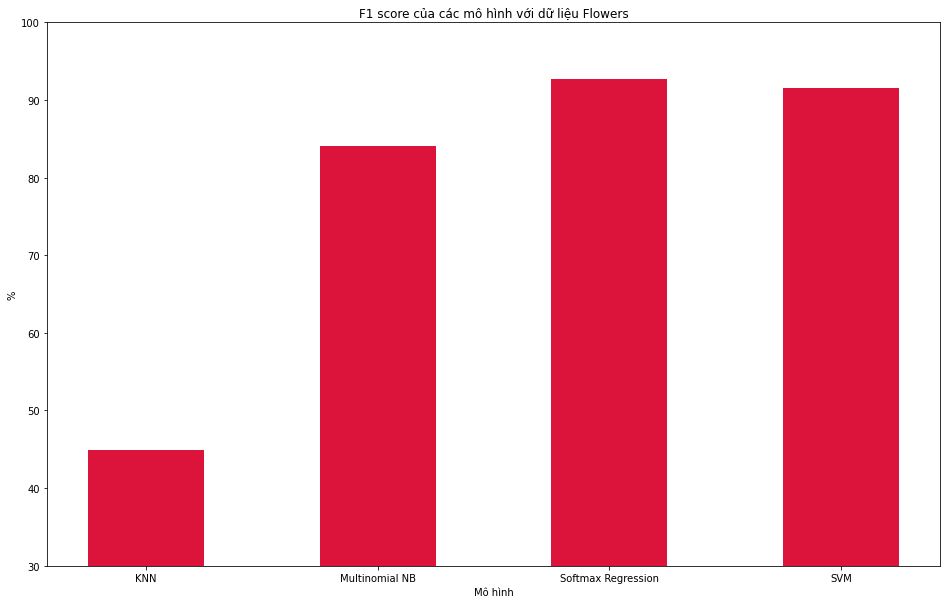

In [50]:
# Về F1 score
plt.figure(figsize=(16, 10))
plt.title('F1 score của các mô hình với dữ liệu Flowers')
plt.xlabel('Mô hình')
plt.ylabel('%')
plt.ylim(30, 100)
plt.bar(models, np.array(f1_scores) * 100, color='crimson', width=0.5, label='F1')
plt.savefig('image/flowers_f1_comparision.png', facecolor='whitesmoke')
plt.show()